In [10]:
from settings import *

In [11]:
H = create_hamiltonian(system), 0.1

In [12]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

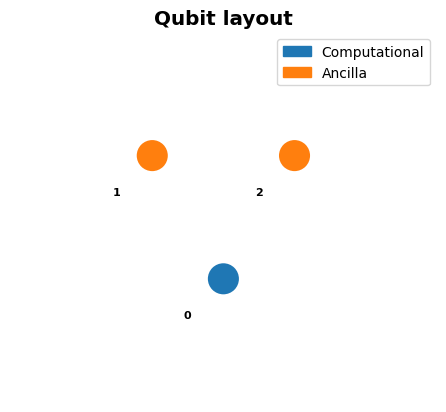

In [13]:
qubits.show_layout()

In [19]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100, theta_init=np.ones(circuit.P))

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=5539
Iteration: 0 
            Max gradient term: 0.02415243427075775 
            Current gradient: [-9.95670368e-03 -4.16333634e-13 -4.16333634e-13 -1.19778645e-02
 -1.37985823e-02 -1.37985823e-02  1.04987195e-03  1.12460468e-02
  1.12460468e-02 -4.52871602e-02  1.04987195e-03  1.12460468e-02
  1.12460468e-02  6.18894653e-03  8.22340125e-03  8.22340125e-03
 -9.15309806e-03  2.30504080e-03  2.30504080e-03 -5.37372020e-02
 -9.15309806e-03  2.30504080e-03  2.30504080e-03  8.96463110e-03
  2.41524343e-02  2.41524343e-02 -1.15205460e-02 -7.73998535e-03
 -7.73998535e-03  3.61697194e-04 -1.15205460e-02 -7.73998535e-03
 -7.73998535e-03 -1.17176402e-02  4.03219033e-03  4.03219033e-03
 -5.03377704e-03 -3.21685151e-03 -3.21685151e-03  9.27428534e-03
 -5.03377704e-03 -3.21685151e-03 -3.21685151e-03 -8.11821676e-03
  7.44347677e-03  7.44347677e-03 -7.99953489e-03  0.00000000e+00
  1.38777878e-13 -3.31736564e-03] 
            Current error: 0.13712857

In [15]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [16]:
theta_opt

array([-1.12836782,  0.1       ,  0.1       , -0.26710992,  0.4055046 ,
        0.4055046 , -1.1631585 ,  0.07636772,  0.07636772, -0.00887456,
       -1.1631585 ,  0.07636772,  0.07636772, -0.22457546,  0.39837686,
        0.39837686, -1.20613217,  0.06302278,  0.06302278, -0.03416892,
       -1.20613217,  0.06302278,  0.06302278, -0.11663417,  0.36571268,
        0.36571268, -1.24105892,  0.06557967,  0.06557967,  0.00821901,
       -1.24105892,  0.06557967,  0.06557967, -0.00360902,  0.31941816,
        0.31941816, -1.26144243,  0.08335102,  0.08335102,  0.07873891,
       -1.26144243,  0.08335102,  0.08335102, -0.12691162,  0.26566008,
        0.26566008, -1.27402704,  0.1       ,  0.1       ,  0.20167347])

rho_rand_haar: seed=83355


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

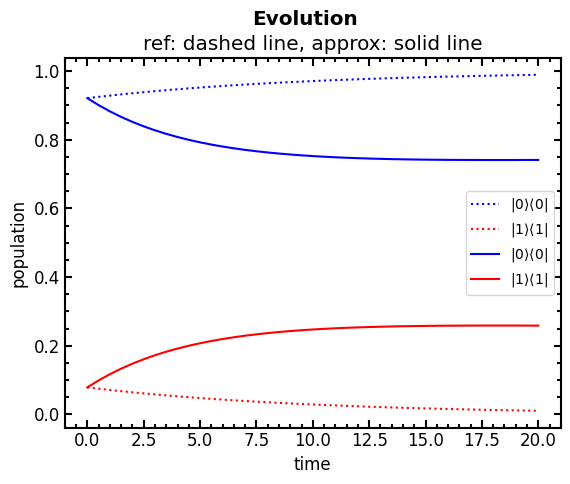

In [47]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]


ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

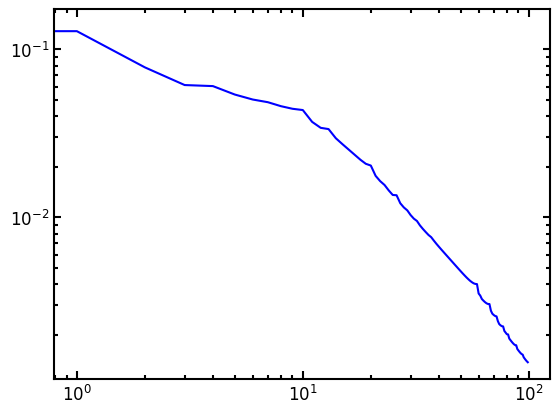

In [31]:
plt.loglog(errors)